In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

In [50]:
data = pd.read_csv('predictive_maintenance.csv')

In [51]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [52]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [54]:
data = data.drop(["UDI",'Product ID'],axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [55]:
data.groupby(['Target','Failure Type']).count()

Type  Air temperature [K]  \
Target Failure Type                                          
0      No Failure                9643                 9643   
       Random Failures             18                   18   
1      Heat Dissipation Failure   112                  112   
       No Failure                   9                    9   
       Overstrain Failure          78                   78   
       Power Failure               95                   95   
       Tool Wear Failure           45                   45   

                                 Process temperature [K]  \
Target Failure Type                                        
0      No Failure                                   9643   
       Random Failures                                18   
1      Heat Dissipation Failure                      112   
       No Failure                                      9   
       Overstrain Failure                             78   
       Power Failure                                  95   
       Tool Wear Failure                              45   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                  9643         9643   
       Random Failures                               18           18   
1      Heat Dissipation Failure                     112          112   
       No Failure                                     9            9   
       Overstrain Failure                            78           78   
       Power Failure                                 95           95   
       Tool Wear Failure                             45           45   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                           9643  
       Random Failures                        18  
1      Heat Dissipation Failure              112  
       No Failure                              9  
       Overstrain Failure                     78  
       Power Failure                          95  
       Tool Wear Failure                      45

In [56]:
data.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [57]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [58]:
data.groupby(['Target','Failure Type']).median()

C:\Users\lenin\AppData\Local\Temp\ipykernel_6564\3968510811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Target','Failure Type']).median()


Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [59]:
data.groupby(['Type','Target']).median()

C:\Users\lenin\AppData\Local\Temp\ipykernel_6564\331131897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Type','Target']).median()


Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

In [60]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

In [62]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,0,299.0,308.7,1408,48.5,25,0,No Failure
9999,2,299.0,308.7,1500,40.2,30,0,No Failure


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)

In [65]:
y_train.value_counts()

0    6754
1     246
Name: Target, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model=RandomForestClassifier()

In [68]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
model.score(X_test,y_test)

0.9856666666666667

In [70]:
y_pred=model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
t=classification_report(y_test,y_pred)
print(t)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.87      0.63      0.73        93

    accuracy                           0.99      3000
   macro avg       0.93      0.82      0.86      3000
weighted avg       0.98      0.99      0.98      3000



In [72]:
f=confusion_matrix(y_test,y_pred)

In [73]:
import matplotlib.pyplot as plt

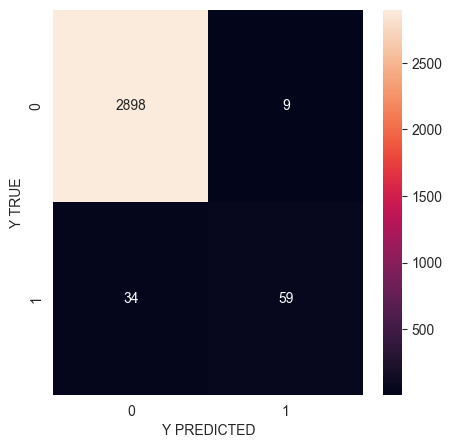

In [74]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(f,annot=True,fmt="d")
plt.ylabel("Y TRUE")
plt.xlabel("Y PREDICTED")
plt.show()

In [75]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9069,2,297.2,308.2,1678,28.1,133
2603,2,299.3,309.2,1334,46.3,31
7738,2,300.5,312.0,1263,60.8,146
1579,1,298.3,308.3,1444,43.8,176
5058,1,303.9,312.9,1526,42.5,194
...,...,...,...,...,...,...
5734,1,302.3,311.8,1369,56.2,208
5191,1,304.0,313.2,1416,46.0,128
5390,0,302.8,312.3,1483,47.2,223
860,0,296.1,306.9,1541,32.6,33


In [76]:
r=model.predict([[2,297.2,308.2,3678,8.1,133]])

C:\Users\lenin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [77]:
type(r[0])

numpy.int64

In [41]:
import pickle

In [42]:
with open("maint.pickle4","wb") as sp:
    pickle.dump(model,sp)